# Ford GoBike Tripdata Analysis
## by Bex

## Investigation Overview
> I am going to alayze different trends among bike rides that were recorded in San Francisco Bay in 2017.

## Dataset Overview
> Ford GoBike dataset contains almost 520k unique rides information divided into 13 columns. This dataset provides insights into each rides duration, start and end times, start and end stations as well as whether the user was just a customer or a member.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
sb.set_style('darkgrid');

In [3]:
# Read in the dataset
df = pd.read_csv('data/fordgobike-tripdata-2017.csv')

In [4]:
# Perform some data wrangling
# Convert start time and end time to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
# Get the month of the start date
df['month'] = pd.DatetimeIndex(df['start_time']).month
# Convert the month from integer to its name
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
# To maintain the order of the months, we should explicitly correct this
months = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_order = pd.api.types.CategoricalDtype(ordered=True, categories=months)
df['month'] = df['month'].astype(month_order)
# I am going to extract weekday names using the datetime module
df['weekday'] = df['start_time'].apply(lambda x: dt.datetime.strftime(x, "%A"))
# As before, set the ordering of the weekdays
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_order = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['weekday'] = df['weekday'].astype(week_order)

In [5]:
mean_duration = df.duration_sec.mean()
number_of_subscribers = df.user_type.value_counts()['Subscriber']
number_of_customers = df.user_type.value_counts()['Customer']
overall_records = df.shape[0]
most_popular_start_station = df.start_station_name.mode()
most_popular_end_station = df.end_station_name.mode()
most_popular_station_combination = (df['start_station_name'] + ' <=> ' + df['end_station_name']).mode()

<h1>General Statistics of the Dataset</h1> 
<h2>Number of Records: 519700</h2>
<h2>Average duration in seconds: 1099</h2>
<h2>Number of Subscribers: 409230</h2>
<h2>Number of Customers: 110470</h2>
<h2>Most Popular Start Station: San Francisco Ferry Building (Harry Bridges Plaza)</h2>
<h2>Most Popular End Station: San Francisco Caltrain</h2>
<h2>Most Popular Route: San Francisco Ferry Building <=> The Embarcadero at Sansome St</h2>

## First, we will look at the distribution of travel durations.

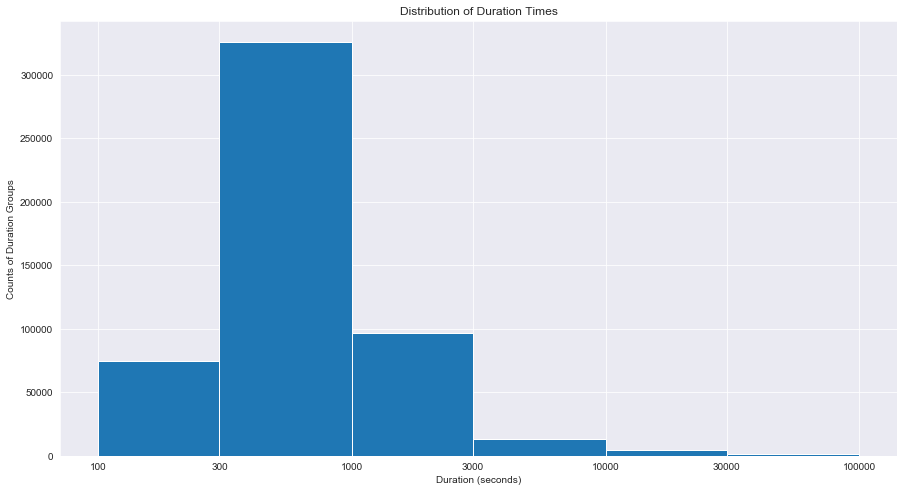

In [6]:
plt.figure(figsize=[15, 8])
bins = [100, 300, 1000, 3000, 10000, 30000, 100000]
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xscale('log')
ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
tick_labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, tick_labels)
plt.xlabel('Duration (seconds)')
plt.ylabel("Counts of Duration Groups")
plt.title("Distribution of Duration Times");

### From the above plot, it can be seen that majority of rentals lasted between 5 and 50 minutes. Therefore, the rest of the analysis fill focus on that particular group

## Now, we will look at the number of each user type across the year

In [7]:
# Take a sample of the dataset with duration times between 5-50 minutes
less_durations = df[(df.duration_sec > 300) & (df.duration_sec < 3000)]

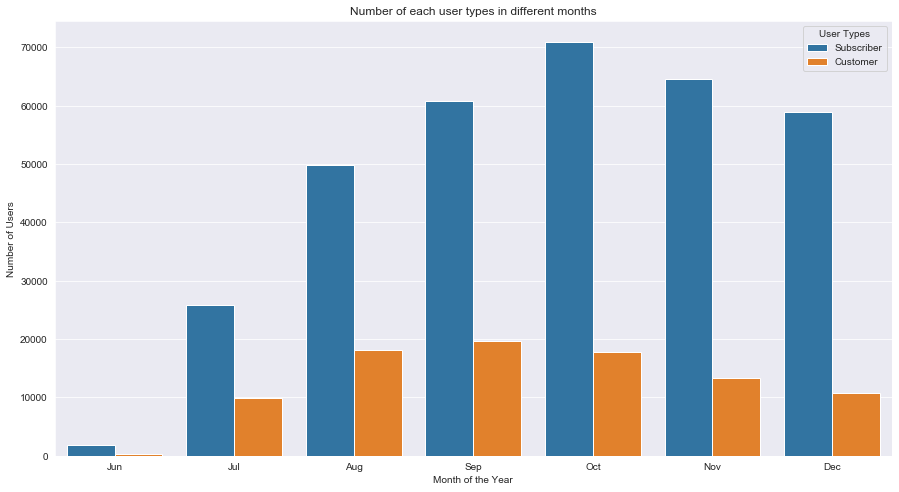

In [8]:
plt.figure(figsize=[15, 8])
sb.countplot(data=less_durations, x='month', hue='user_type')
plt.title('Number of each user types in different months')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Users')
plt.legend(title='User Types');

### One thing that jumps up is that the number of subscribers is significantly higher than that of customers. Also, most popular season of 2017 was autumn with roughly 260k rentals overall.

### Next, I am going to see the distribution of user types in days of a week. 

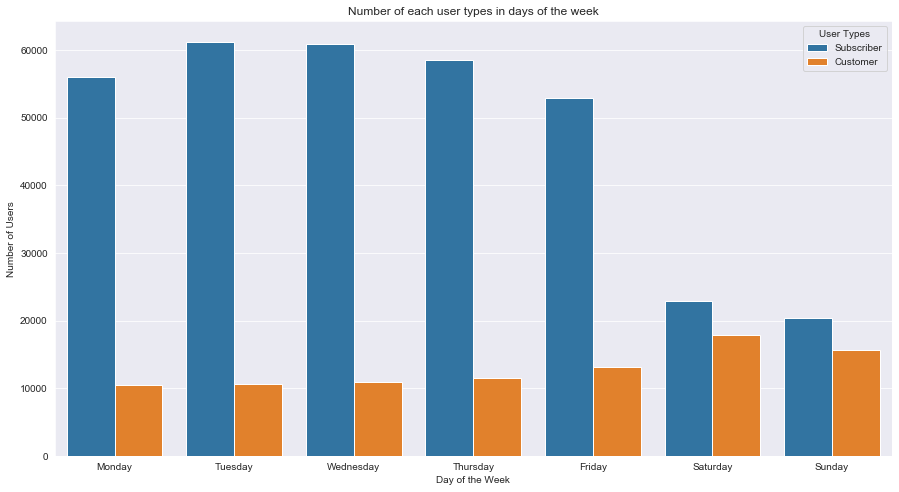

In [9]:
plt.figure(figsize=[15, 8])
sb.countplot(data=less_durations, x='weekday', hue='user_type')
plt.title('Number of each user types in days of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Users')
plt.legend(title='User Types');

### Well, you might have assumed that there would be more rentals during weekends, which was my first assumption, too. However, the clustered bar chart above proves otherwise. The number of rides during weekdays are multiple times higher than weekends. Also, note that this plot once again shows the magnitude of subscribers is much bigger.

### Let's also look at the duration of rides in each day of the week. The plot below is going to reveal an interesting insight

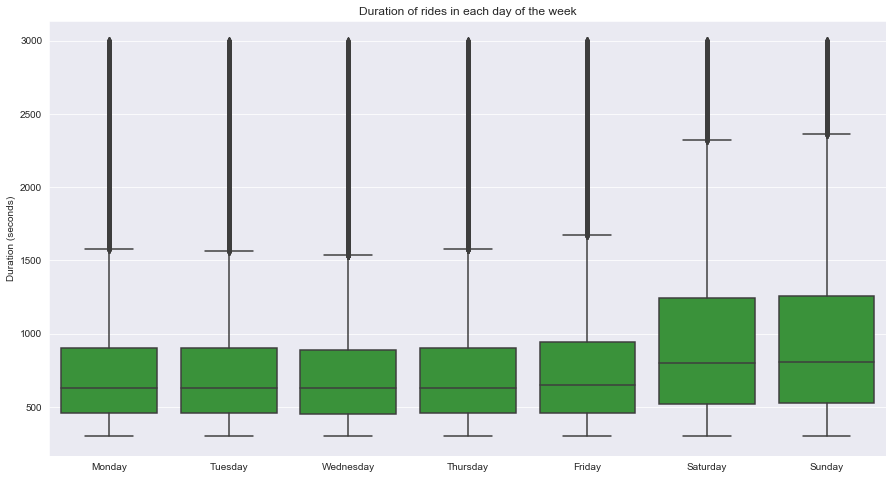

In [10]:
plt.figure(figsize=[15, 8])
color = sb.color_palette()[2]
sb.boxplot(data=less_durations, x='weekday', y='duration_sec', color=color)
plt.title('Duration of rides in each day of the week')
plt.ylabel('Duration (seconds)')
plt.xlabel('');

### Well, I know that you have guessed that the duration times would be longer since there were much more rentals during weekday. However, the boxplots above tell us that the median duration for rides in weekends were higher than other days and the fact that the boxplots of weekend days have fewer outliers suggest that this trend is not just due to some random long-lasting rides.

### Now in these last two diagrams, we will be looking at three features of bike rides at the same time. First, we will explore how the number of user types and their ride duration differed between months.

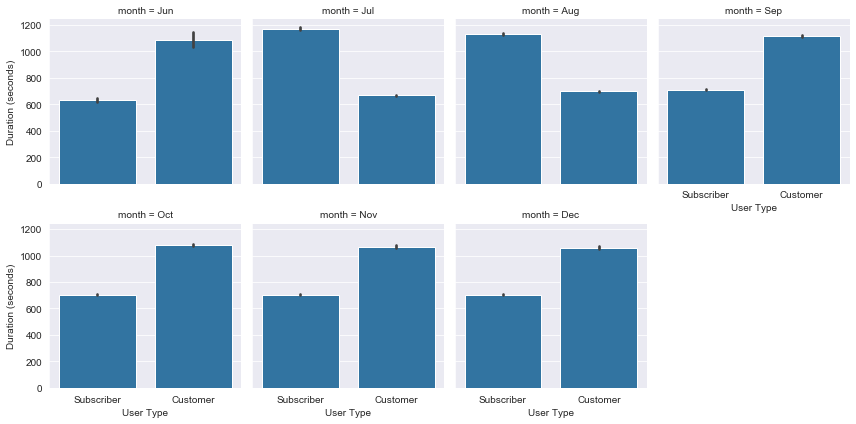

In [13]:
g = sb.FacetGrid(data=less_durations, col='month', col_wrap=4)
g.map(sb.barplot, 'user_type', 'duration_sec')
g.axes[0].set_ylabel('Duration (seconds)')
g.axes[4].set_ylabel('Duration (seconds)')
g.axes[3].set_xlabel('User Type')
g.axes[4].set_xlabel('User Type')
g.axes[5].set_xlabel('User Type')
g.axes[6].set_xlabel('User Type');

### The above facetgrid indicates that the duration of rides varies significantly for both user types thoughout the year.

### Lastly, the difference of duration in days of the week grouped by user type

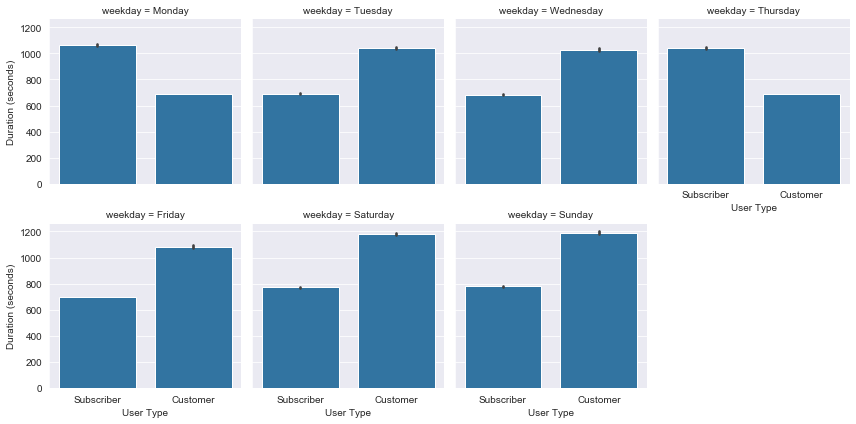

In [14]:
g = sb.FacetGrid(data=less_durations, col='weekday', col_wrap=4)
g.map(sb.barplot, 'user_type', 'duration_sec')
g.axes[0].set_ylabel('Duration (seconds)')
g.axes[4].set_ylabel('Duration (seconds)')
g.axes[3].set_xlabel('User Type')
g.axes[4].set_xlabel('User Type')
g.axes[5].set_xlabel('User Type')
g.axes[6].set_xlabel('User Type');

### When we look at this plot, the trend we found earlier that duration times were longer during weekends is less pronounced.

### Besides, the duration of rides for customers were, overall, longer than that of subscribers. The last two plots clearly shows this trend.